In [2]:
#Escoger los indicadores del Banco Mundial 

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import glob
import os
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv("/content/drive/MyDrive/Ciencia de Datos/PROYECTO_1_PARCIAL/Crecimiento_de_la_población.csv", skiprows = 4) 
df2 = pd.read_csv("/content/drive/MyDrive/Ciencia de Datos/PROYECTO_1_PARCIAL/Crecimiento_del_PIB.csv", skiprows = 4) 
df3 = pd.read_csv("/content/drive/MyDrive/Ciencia de Datos/PROYECTO_1_PARCIAL/Gasto_público_en_educación.csv", skiprows = 4) 
df4 = pd.read_csv("/content/drive/MyDrive/Ciencia de Datos/PROYECTO_1_PARCIAL/Precio_de_Inmobiliario.csv") 
Data = pd.concat([df1, df2, df3, df4])
Data.sample(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,7.0,2008.0,WD,Normal,134432.0
783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,7.0,2009.0,WD,Normal,165500.0
194,Portugal,PRT,Crecimiento del PIB (% anual),NY.GDP.MKTP.KD.ZG,NaN,5.534903,6.614448,5.873702,6.310747,7.468989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,China,CHN,Crecimiento de la población (% anual),SP.POP.GROW,NaN,-1.015528,0.820456,2.457647,2.320683,2.381368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Limpiar los datos

def get_years():
  years = []
  for i in range(1960, 1965):
    years.append(str(i))
  return years

In [5]:
Data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965',
       ...
       'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object', length=148)

In [6]:
Data= Data.melt(id_vars=['Country Name', 'Country Code',	'Indicator Name',	'Indicator Code','PoolArea', 'SalePrice','SaleType', 'MoSold','YrSold'], value_vars=get_years(),var_name='Year', value_name='Valor')
Data['Year']= Data['Year'].astype(int)

In [7]:
Data.sample(4)

,Country Name,Country Code,Indicator Name,Indicator Code,PoolArea,SalePrice,SaleType,MoSold,YrSold,Year,Valor
8344,NaN,NaN,NaN,NaN,0.0,107000.0,WD,3.0,2010.0,1963,NaN
4873,Groenlandia,GRL,Crecimiento del PIB (% anual),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,1962,NaN
9397,Croacia,HRV,Crecimiento del PIB (% anual),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,1964,NaN
9788,Eswatini,SWZ,"Gasto público en educación, total (% del PIB)",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,1964,NaN


In [8]:
Data.fillna(0.,inplace=True)
Data.sample(4)

,Country Name,Country Code,Indicator Name,Indicator Code,PoolArea,SalePrice,SaleType,MoSold,YrSold,Year,Valor
2980,Polonia,POL,"Gasto público en educación, total (% del PIB)",SE.XPD.TOTL.GD.ZS,0.0,0.0,0.0,0.0,0.0,1961,0.000000
6774,Aruba,ABW,Crecimiento de la población (% anual),SP.POP.GROW,0.0,0.0,0.0,0.0,0.0,1963,1.389337
9106,Frágiles y situaciones de conflicto afectados,FCS,Crecimiento de la población (% anual),SP.POP.GROW,0.0,0.0,0.0,0.0,0.0,1964,2.219973
226,Seychelles,SYC,Crecimiento de la población (% anual),SP.POP.GROW,0.0,0.0,0.0,0.0,0.0,1960,0.000000


In [9]:
#Hacer el análisis exploratorio de las variables (indicadores) y el análisis correlacional.

Data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'PoolArea', 'SalePrice', 'SaleType', 'MoSold', 'YrSold', 'Year',
       'Valor'],
      dtype='object')

<AxesSubplot:title={'center':'Valor'}, xlabel='Country Name'>

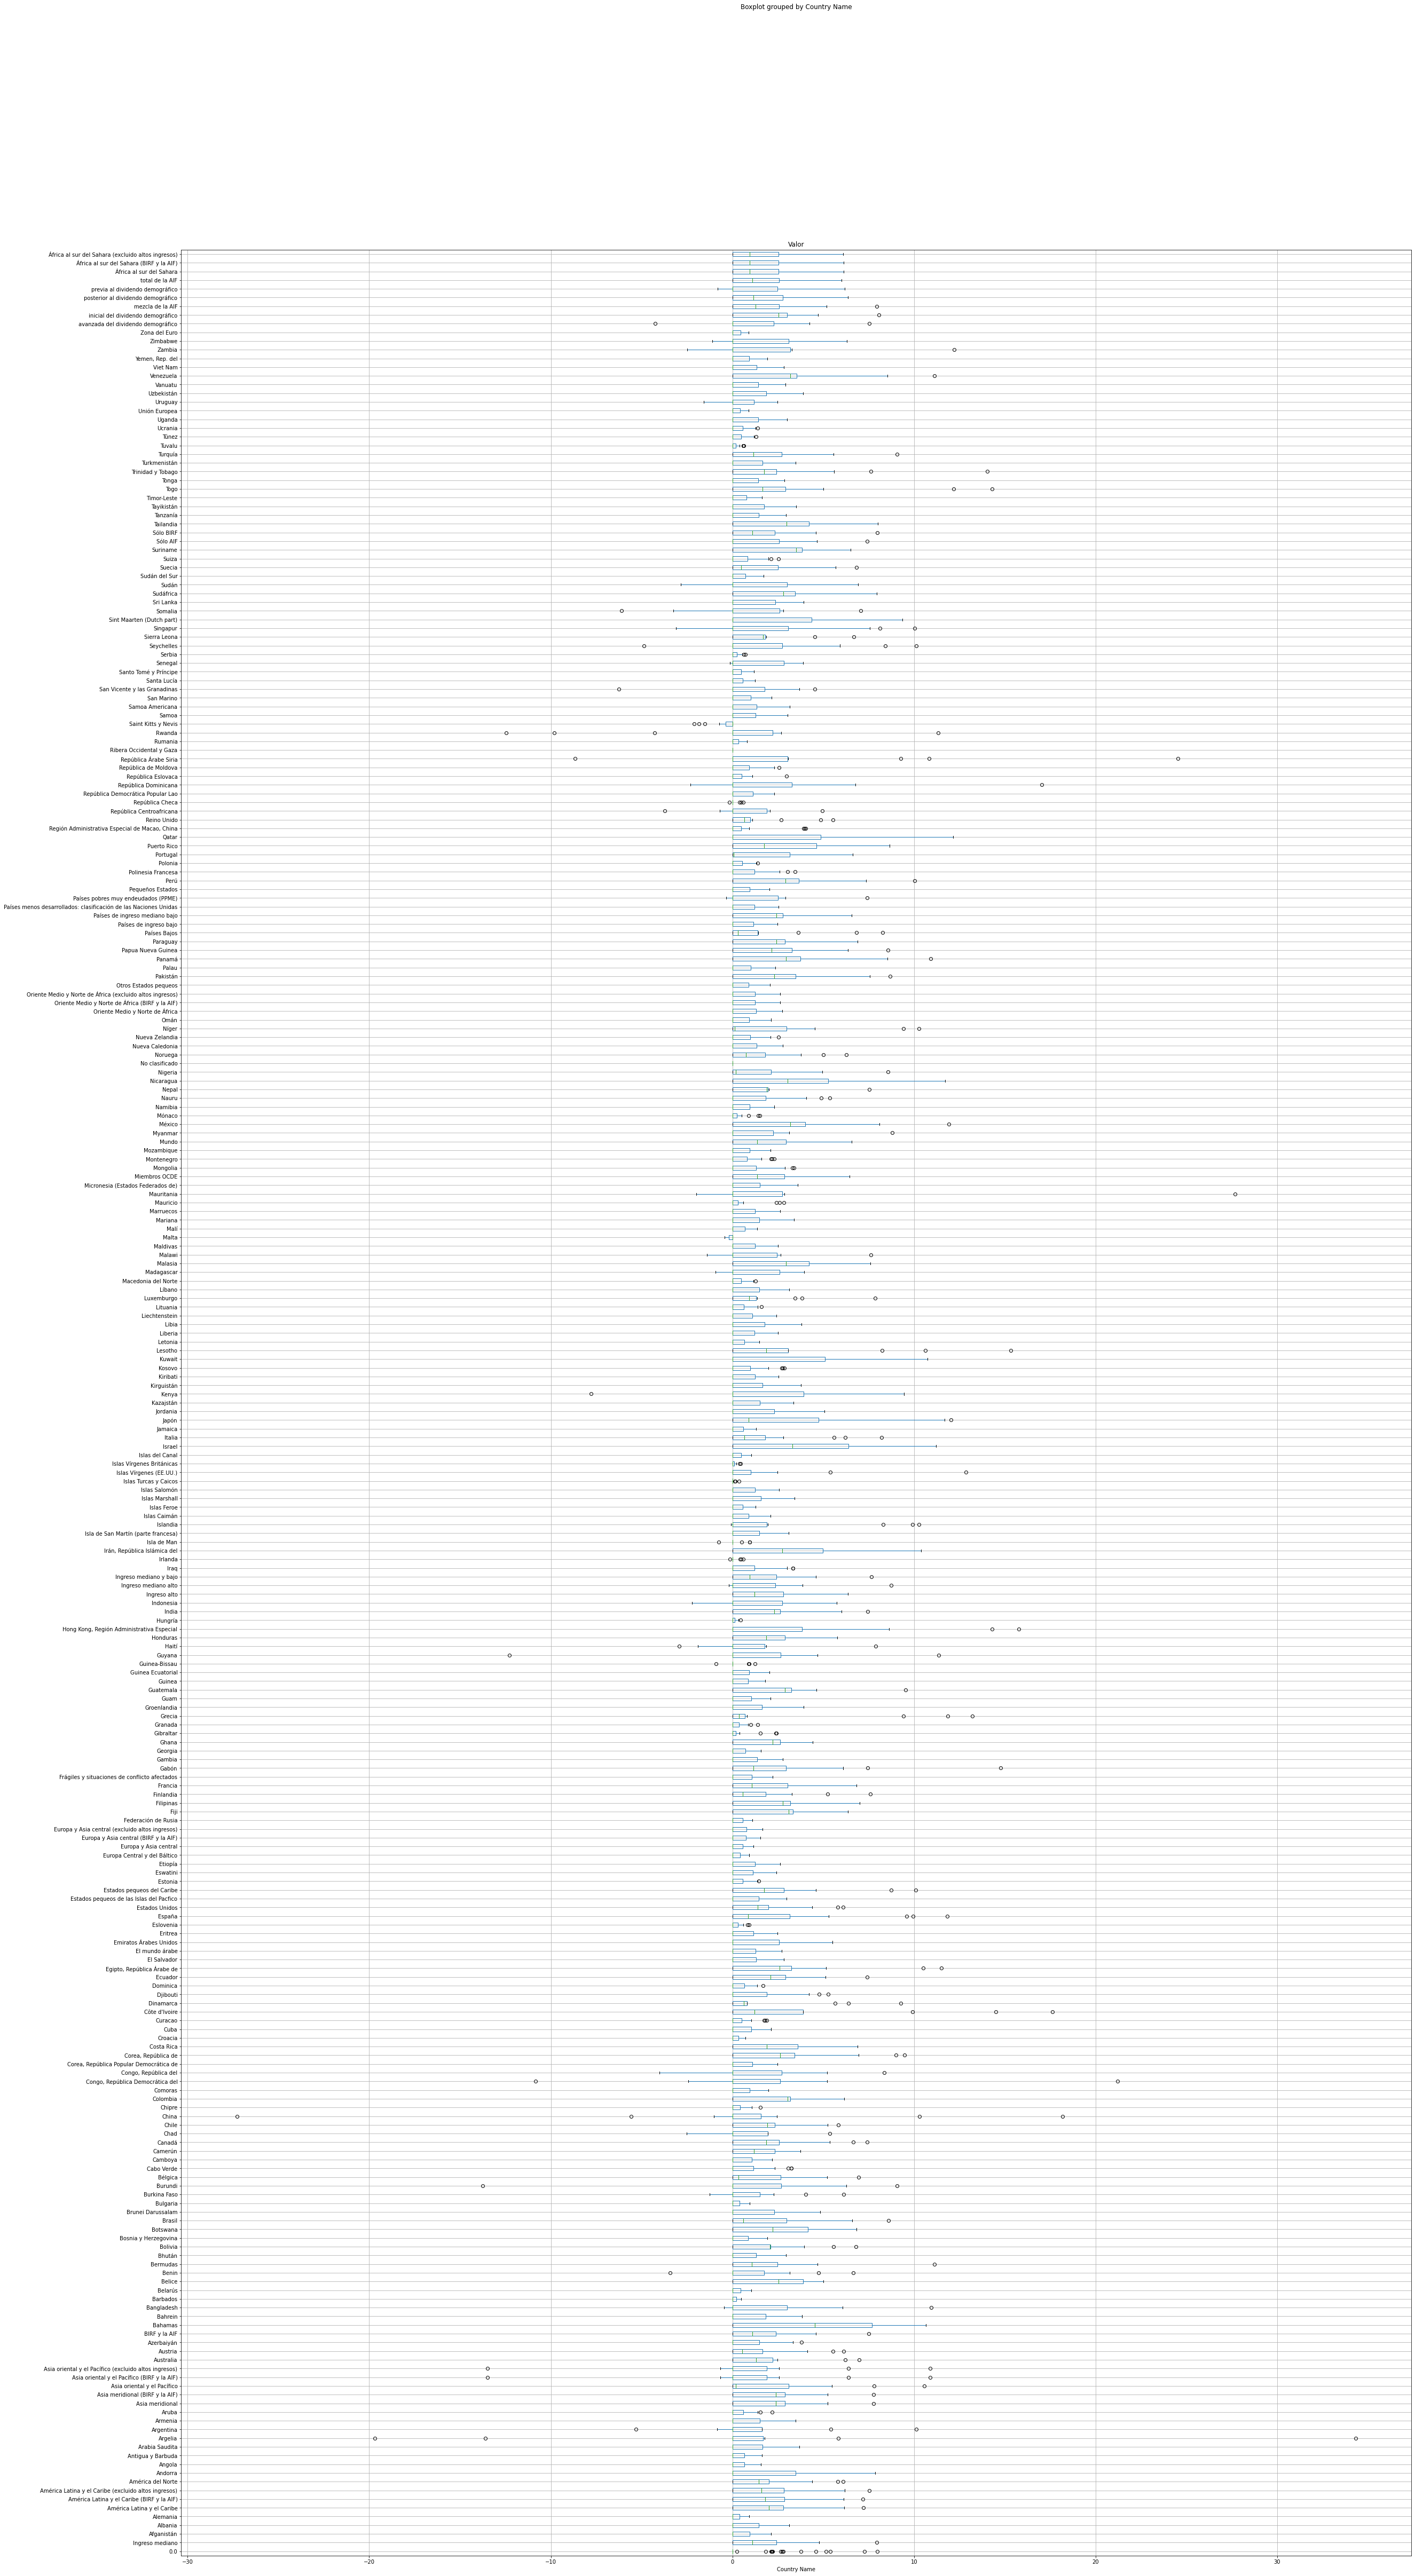

In [21]:
Data.boxplot(vert=False, by= 'Country Name', column=['Valor'], figsize=(40,80))

In [22]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11290 entries, 0 to 11289
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    11290 non-null  object 
 1   Country Code    11290 non-null  object 
 2   Indicator Name  11290 non-null  object 
 3   Indicator Code  11290 non-null  object 
 4   PoolArea        11290 non-null  float64
 5   SalePrice       11290 non-null  float64
 6   SaleType        11290 non-null  object 
 7   MoSold          11290 non-null  float64
 8   YrSold          11290 non-null  float64
 9   Year            11290 non-null  int64  
 10  Valor           11290 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 970.4+ KB


In [23]:
len(Data)

11290

In [24]:
Data.corr()

,PoolArea,SalePrice,MoSold,YrSold,Year,Valor
PoolArea,1.000000e+00,8.766562e-02,1.344545e-02,4.073571e-02,-3.883178e-14,-0.014459
SalePrice,8.766562e-02,1.000000e+00,6.692241e-01,8.044481e-01,-3.547895e-13,-0.285072
MoSold,1.344545e-02,6.692241e-01,1.000000e+00,8.117726e-01,-3.621423e-13,-0.287694
YrSold,4.073571e-02,8.044481e-01,8.117726e-01,1.000000e+00,-4.460002e-13,-0.354360
Year,-3.883178e-14,-3.547895e-13,-3.621423e-13,-4.460002e-13,1.000000e+00,0.116876
Valor,-1.445865e-02,-2.850717e-01,-2.876940e-01,-3.543604e-01,1.168762e-01,1.000000


<AxesSubplot:>

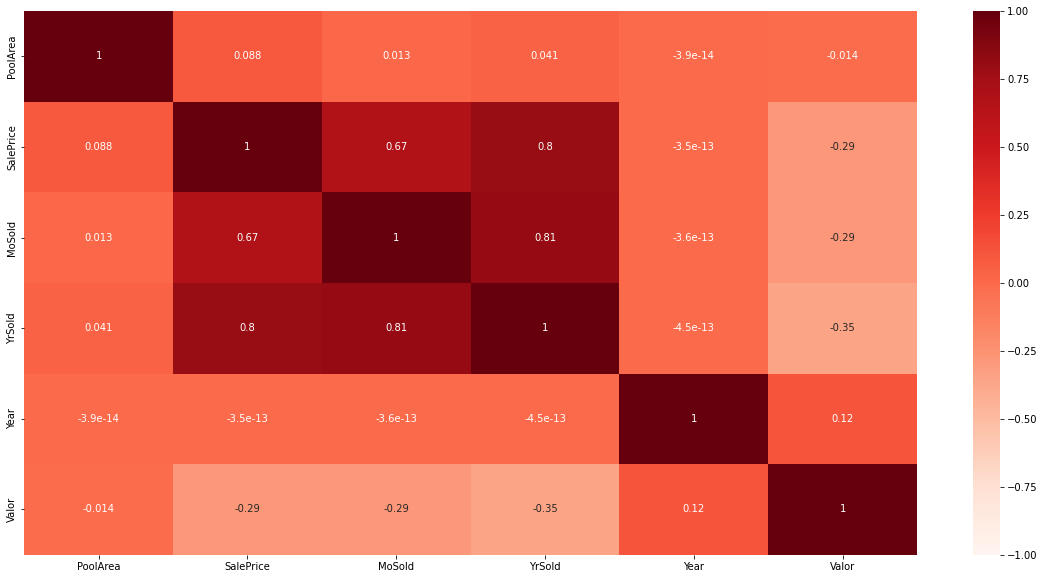

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(Data.corr(),vmin=-1, vmax=1, annot=True, cmap="Reds")

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

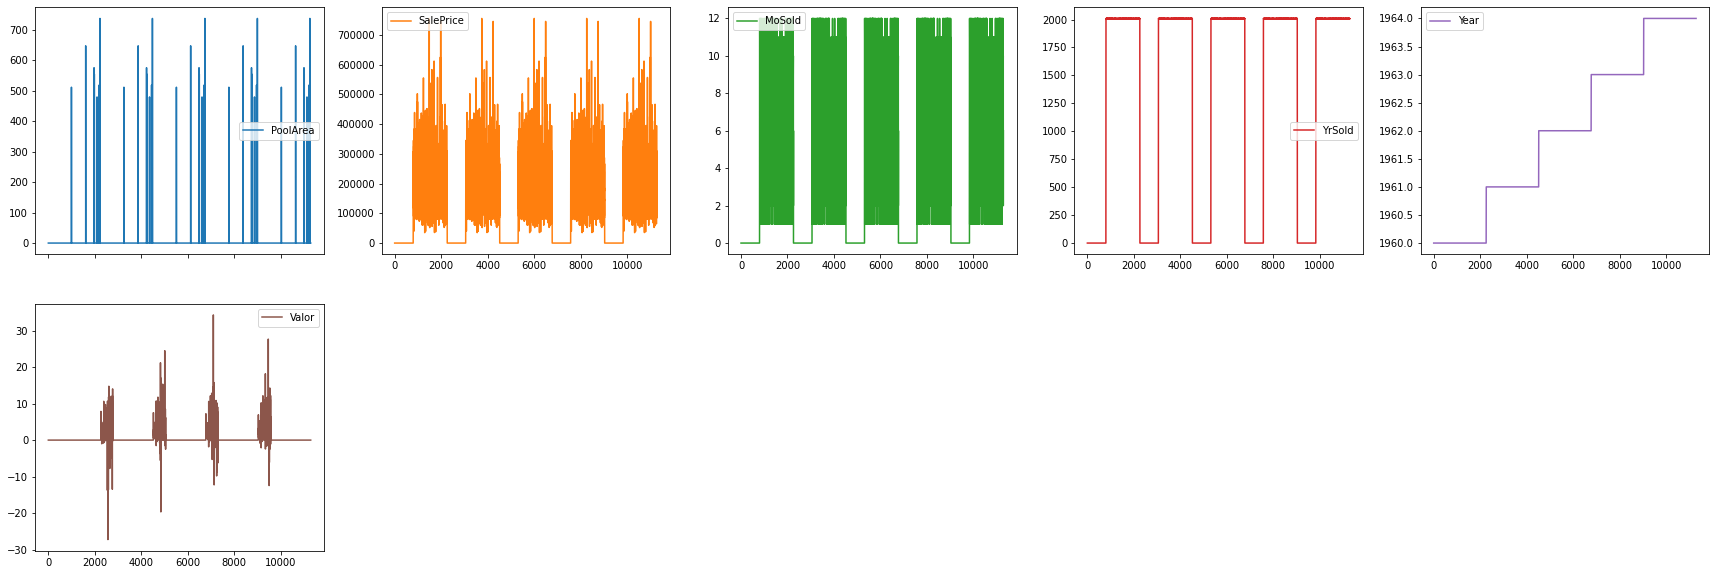

In [26]:
Data.plot(subplots=True, layout=(-1,5), figsize=(30,10) )

In [27]:
#Determinar el K adecuado 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering   # Clustering jerárquico

In [28]:
Data = Data[['Year','Valor']]
print('Total Row : ', len(Data))

sc_dfa = StandardScaler()
dfa_std = sc_dfa.fit_transform(Data.astype(float))

Total Row :  11290


In [29]:
Data.sample(5)

,Year,Valor
3427,1961,0.0
5536,1962,0.0
2153,1960,0.0
10756,1964,0.0
821,1960,0.0


In [30]:
#Crear el modelo K-Means 

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(dfa_std)
labels = kmeans.labels_
new_Data = pd.DataFrame(data = dfa_std, columns = ['Year','Valor'])
Data['label_kmeans'] = labels

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-30-a4fb2d9ff9dd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['label_kmeans'] = labels


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


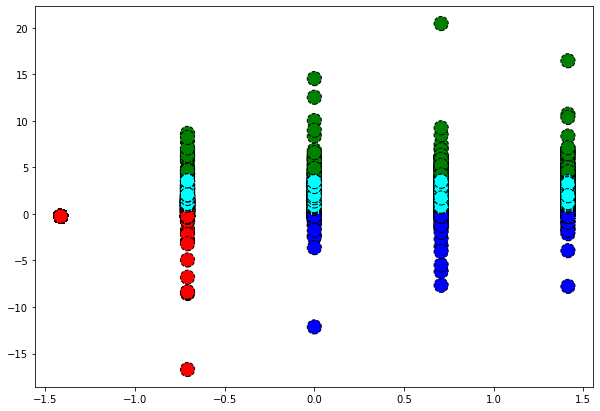

In [32]:
#técnica de análisis del codo

kmeans = KMeans(n_clusters=n_clusters, random_state=12).fit(dfa_std)
labels = kmeans.labels_
new_Data = pd.DataFrame(data = dfa_std, columns =['Year','Valor'])
new_Data['label_kmeans'] = labels

# Plot
fig, ax = plt.subplots(figsize=(10,7))
colorclu = ['blue','red','green','cyan','pink','orange','purple']
for i in range(n_clusters):

 # Hacemos un scatter plot de cada uno de los datos 
  plt.scatter(new_Data["Year"][new_Data["label_kmeans"] == i], new_Data["Valor"][new_Data["label_kmeans"] == i], 
            color = colorclu[i], s=200, edgecolor='black',linestyle='--')
  
  #Asignar los clusters de K-means al dataset original.
centers = kmeans.cluster_centers_



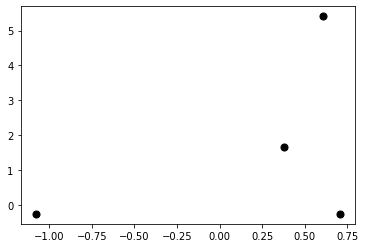

In [33]:
# Hacemos un scatter plot de cada uno de los datos

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50);
ax.set_xlabel('AÑO')
ax.set_ylabel('VALOR')
plt.show()

In [37]:
Data.to_csv("/content/drive/MyDrive/Ciencia de Datos/PROYECTO/PROYECTO_2P.CSV")